# PIVOT 2022 Geothermal Datathon: SPE - Gulf Coast Section
## Data Modeling: Power Enthalpy


#### - Team: 
GeotherML    
    
#### - Team Members:
- Antonio Dagnino
- Andres Calvo
- Oliver Rojas
- Yusuf Falola
- Chandryl Paterne    
    
#### - Contents:

   - **Data Modeling: Power Enthalpy**
       - Import inputs and outputs
       - Train / Test split
       - Scale Data
       - Create Neural Network
       - Fit the Model
       

   - **Evaluation Metrics**
       - MAE
       - MSE
       - RMSE
       - Explained variance score
       - Compare mean values per year: Predictions Vs Real



### Data Modeling: Power Enthalpy

- Data Modeling Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score

In [2]:
# Customize Plots
rcParams['figure.figsize'] = 14,8
rcParams['axes.titlesize'] = 15
rcParams['font.size']=10
sns.set_style('whitegrid')

#show all columns in Jupyter Notebook
pd.set_option("display.max_columns", None)

In [3]:
inputs = pd.read_csv('inputs.csv',index_col=0)
df_Enthalpy = pd.read_csv('df_Enthalpy.csv',index_col=0)

- Train / Test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(inputs.values,df_Enthalpy.values,test_size=0.2,random_state=101)

- Scale Data

In [5]:
scaler = MinMaxScaler()

In [6]:
X_train = scaler.fit_transform(X_train)

In [7]:
X_test = scaler.transform(X_test)

In [8]:
X_train.shape

(36388, 37)

In [9]:
X_test.shape

(9097, 37)

- Create Neural Network

In [10]:
model = Sequential()

model.add(Dense(37,activation='relu'))
model.add(Dense(37,activation='relu'))
model.add(Dense(37,activation='relu'))
model.add(Dense(37,activation='relu'))
model.add(Dense(20))


model.compile(optimizer='adam',loss='mse')

- Fit the Model

In [11]:
# - Hyperparameter Tunning:

batchsize = 128
epochs = 400

In [12]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [13]:
model.fit(x=X_train,
        y=y_train,
        validation_data=(X_test,y_test),
        batch_size=batchsize,
        epochs=epochs,
        verbose=1,
        callbacks=[early_stop])

Epoch 1/400
285/285 [==============================] - 1s 2ms/step - loss: 158995.7969 - val_loss: 39075.2500
Epoch 2/400
285/285 [==============================] - 0s 2ms/step - loss: 32080.3984 - val_loss: 28947.6309
Epoch 3/400
285/285 [==============================] - 0s 2ms/step - loss: 28509.8789 - val_loss: 27869.4004
Epoch 4/400
285/285 [==============================] - 0s 2ms/step - loss: 27268.1074 - val_loss: 26674.5312
Epoch 5/400
285/285 [==============================] - 0s 2ms/step - loss: 25171.6250 - val_loss: 23974.0898
Epoch 6/400
285/285 [==============================] - 0s 2ms/step - loss: 22710.9238 - val_loss: 21819.8613
Epoch 7/400
285/285 [==============================] - 0s 2ms/step - loss: 20827.8887 - val_loss: 20343.8281
Epoch 8/400
285/285 [==============================] - 1s 2ms/step - loss: 19763.3984 - val_loss: 19676.0156
Epoch 9/400
285/285 [==============================] - 1s 2ms/step - loss: 19116.3984 - val_loss: 18989.4766
Epoch 10/400
285/2

285/285 [==============================] - 0s 2ms/step - loss: 11747.1318 - val_loss: 12029.0068
Epoch 76/400
285/285 [==============================] - 0s 2ms/step - loss: 11790.2002 - val_loss: 12017.9922
Epoch 77/400
285/285 [==============================] - 1s 2ms/step - loss: 11707.8711 - val_loss: 12328.0527
Epoch 78/400
285/285 [==============================] - 0s 2ms/step - loss: 11669.3125 - val_loss: 12015.4609
Epoch 79/400
285/285 [==============================] - 1s 2ms/step - loss: 11683.5098 - val_loss: 11902.4150
Epoch 80/400
285/285 [==============================] - 0s 2ms/step - loss: 11682.0557 - val_loss: 11931.0986
Epoch 81/400
285/285 [==============================] - 1s 2ms/step - loss: 11614.9414 - val_loss: 11956.2666
Epoch 82/400
285/285 [==============================] - 0s 2ms/step - loss: 11676.7881 - val_loss: 11833.3867
Epoch 83/400
285/285 [==============================] - 1s 2ms/step - loss: 11616.9697 - val_loss: 12440.1357
Epoch 84/400
285/285 [=

285/285 [==============================] - 0s 2ms/step - loss: 10837.0801 - val_loss: 11492.3096
Epoch 148/400
285/285 [==============================] - 0s 2ms/step - loss: 10720.8027 - val_loss: 11485.4199
Epoch 149/400
285/285 [==============================] - 0s 2ms/step - loss: 10716.5518 - val_loss: 11583.4404
Epoch 150/400
285/285 [==============================] - 0s 2ms/step - loss: 10738.7979 - val_loss: 11931.9502
Epoch 151/400
285/285 [==============================] - 0s 2ms/step - loss: 10715.1719 - val_loss: 11362.5947
Epoch 152/400
285/285 [==============================] - 0s 2ms/step - loss: 10665.1152 - val_loss: 11269.4326
Epoch 153/400
285/285 [==============================] - 0s 2ms/step - loss: 10674.7031 - val_loss: 11961.8936
Epoch 154/400
285/285 [==============================] - 0s 2ms/step - loss: 10669.5996 - val_loss: 11488.8975
Epoch 155/400
285/285 [==============================] - 0s 2ms/step - loss: 10655.8877 - val_loss: 11617.3301
Epoch 156/400
2

In [14]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

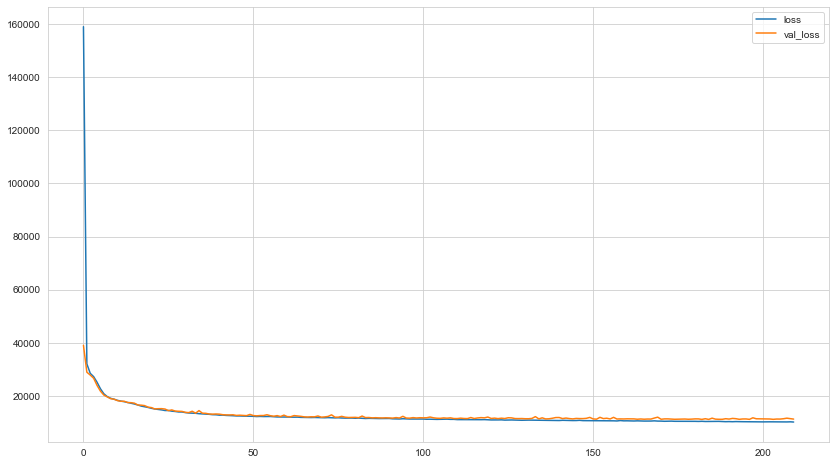

In [15]:
losses.plot()

### Evaluation Metrics

In [16]:
def eval_metrics_timeseries(real_values,pred,name='Variable'):
    print(f"""
        ------- {name} ------
        
MAE: {mean_absolute_error(real_values,pred):.3f},
MSE: {mean_squared_error(real_values,pred):.3f},
RMSE: {np.sqrt(mean_squared_error(real_values,pred)):.3f},
Explained Variance Score: {explained_variance_score(real_values,pred)*100:.3f}%,

Compare Mean values per Year: Predictions VS Real:

{pd.concat([pd.DataFrame(real_values).mean(),pd.DataFrame(pred).mean()],axis=1,keys=['Avg real',' Avg Pred'],names='Year')}
    """)

In [17]:
predictions_enthalpy = model.predict(X_test)

In [18]:
eval_metrics_timeseries(y_test,predictions_enthalpy,name='Power Enthalpy (Kj/Kg)')


        ------- Power Enthalpy (Kj/Kg) ------
        
MAE: 68.826,
MSE: 11295.843,
RMSE: 106.282,
Explained Variance Score: 76.311%,

Compare Mean values per Year: Predictions VS Real:

Year    Avg real    Avg Pred
0     720.673024  727.023254
1     685.503591  693.649292
2     669.999661  678.117432
3     659.121084  667.273560
4     650.643491  658.646667
5     643.678181  651.510315
6     637.751328  645.419678
7     632.605190  640.116699
8     628.050429  635.330566
9     623.965584  631.186340
10    620.241453  627.290100
11    616.822240  623.812683
12    613.660062  620.654175
13    610.725212  617.656555
14    608.000128  614.906677
15    605.442206  612.135742
16    603.023039  609.653931
17    600.744027  607.285156
18    598.577764  605.018372
19    596.526776  602.882385
    


<AxesSubplot:title={'center':'Avg Power Enthalpy: Predicted Vs Real values'}>

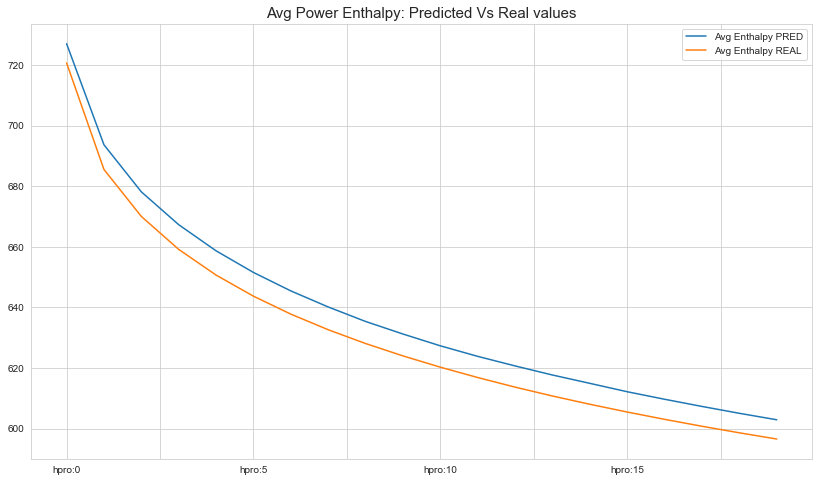

In [19]:
pd.DataFrame(predictions_enthalpy,columns=df_Enthalpy.columns).mean().plot(legend=True,label='Avg Enthalpy PRED',
                                                                           title='Avg Power Enthalpy: Predicted Vs Real values')
pd.DataFrame(y_test,columns=df_Enthalpy.columns).mean().plot(legend=True,label='Avg Enthalpy REAL')

### END